In [39]:
# importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings package
import warnings
# filter unharmful warnings
warnings.filterwarnings('ignore')

# display maximum columns of data set
pd.set_option('display.max_columns',None)

# Data Transformation and Cleaning

In [40]:
# loading the data set
fraud=pd.read_csv(r"N3 DataSet.csv",header=0)

# Maintain a raw backup
back_up1=fraud.copy()

fraud.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFlaggedFraud.1
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,NaN
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,NaN
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,NaN
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,NaN
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,NaN


In [41]:
# displaying the info about the data set features...
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   step              1048575 non-null  int64  
 1   type              1048575 non-null  object 
 2   amount            1048575 non-null  float64
 3   nameOrig          1048575 non-null  object 
 4   oldbalanceOrg     1048575 non-null  float64
 5   newbalanceOrig    1048575 non-null  float64
 6   nameDest          1048575 non-null  object 
 7   oldbalanceDest    1048575 non-null  float64
 8   newbalanceDest    1048575 non-null  float64
 9   isFraud           1048575 non-null  int64  
 10  isFlaggedFraud    1048575 non-null  int64  
 11  isFlaggedFraud.1  0 non-null        float64
dtypes: float64(6), int64(3), object(3)
memory usage: 96.0+ MB


In [42]:
# check for null values in the data set
fraud.isnull().sum()

# There are no null values in data set

step                      0
type                      0
amount                    0
nameOrig                  0
oldbalanceOrg             0
newbalanceOrig            0
nameDest                  0
oldbalanceDest            0
newbalanceDest            0
isFraud                   0
isFlaggedFraud            0
isFlaggedFraud.1    1048575
dtype: int64

In [43]:
# drop last columns as it has all null values...
del fraud['isFlaggedFraud.1']

In [44]:
print("no of unique step: ",len(fraud['step'].value_counts()))
print("no of unique types: ",len(fraud['type'].value_counts()))
print("no of unique nameOrig: ",len(fraud['nameOrig'].value_counts()))
print("no of unique nameDest: ",len(fraud['nameDest'].value_counts()))
print("no of unique isFlaggedFraud: ",len(fraud['isFlaggedFraud'].value_counts()))

no of unique step:  95
no of unique types:  5
no of unique nameOrig:  1048317
no of unique nameDest:  449635
no of unique isFlaggedFraud:  1


In [45]:
# this is a continuous quantity only...
fraud['step'].value_counts()

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: step, Length: 95, dtype: int64

In [46]:
# Remove 'isFlaggedFraud' column.
del fraud['isFlaggedFraud']

In [47]:
# Check for duplicated records
fraud.duplicated().any()

False

In [48]:
# drop columns that doesn't effect our obtained isFraud
# These columns 'nameOrig','nameDest'
fraud.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)

In [49]:
# We have some Categorical variables in the data set
# So convert them into Discrete Numeric... via LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fraud['type']=le.fit_transform(fraud['type'])
fraud['isFraud']=le.fit_transform(fraud['isFraud'])

In [50]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [51]:
# Display the information about the dataset features...
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int64  
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
 7   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 64.0 MB


In [52]:
# Again check for duplicates if any...
fraud.duplicated().any()

True

In [53]:
# Find number of duplicates in data set
print("no of duplicates: ",len(fraud[fraud.duplicated()]))

# drop the duplicates from the above data...
fraud.drop_duplicates(inplace=True,keep='last')

no of duplicates:  115


In [54]:
# Now reset the index to avoid ambiguity...
fraud.reset_index(drop=True,inplace=True)

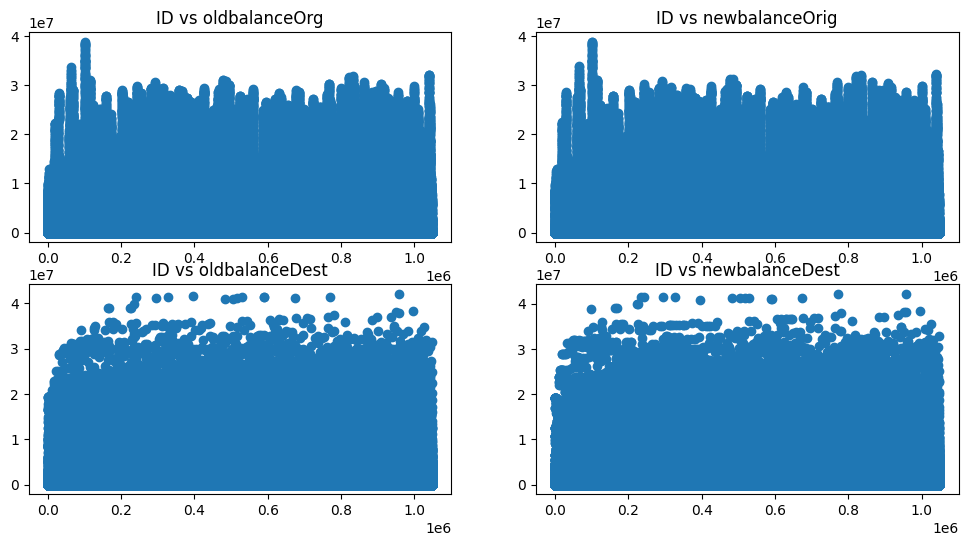

In [55]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,6))
ax[0][0].scatter(fraud.index,fraud['oldbalanceOrg'])
ax[0][0].set_title('ID vs oldbalanceOrg')
ax[0][1].scatter(fraud.index,fraud['newbalanceOrig'])
ax[0][1].set_title('ID vs newbalanceOrig')
ax[1][0].scatter(fraud.index,fraud['oldbalanceDest'])
ax[1][0].set_title('ID vs oldbalanceDest')
ax[1][1].scatter(fraud.index,fraud['newbalanceDest'])
ax[1][1].set_title('ID vs newbalanceDest')
plt.show()

In [56]:
# Looks like they are very less outliers so we can ignore them...
# find ratio....
count=fraud['isFraud'].value_counts()
print(f"ratio is: {count[0]/count[1]}:1")


ratio is: 917.091068301226:1


In [57]:
# Now maintain a backup for the data set
back_up2=fraud.copy()

In [58]:
# Split Target and Independent Features
TargetVar='isFraud'
IndepVar=[]
for col in fraud.columns:
    if col!=TargetVar:
        IndepVar.append(col)

# Split data into x and y sub dataframes
x=fraud[IndepVar]
y=fraud[TargetVar]

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((733922, 7), (314538, 7), (733922,), (314538,))

In [60]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
x_train,y_train=oversample.fit_resample(x_train,y_train)
x_test,y_test=oversample.fit_resample(x_test,y_test)

In [61]:
# Now Scale the continuous features of data set...
# define continuous features into the cols
cols=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_test[cols]=mmscaler.fit_transform(x_test[cols])

# convert x_train and x_test back again into dataframes
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [62]:
# Import results table header...
Classification_Results=pd.read_csv(r"HRResults.csv",header=0)
Classification_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [63]:
KNN_Results=pd.read_csv(r"KNN_Results.csv",header=0)
KNN_Results.head()

In [63]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 20, 1):
    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [ ]:
# -----HERE------

Model Name:  LogisticRegression()
Confusion matrix : 
 [[244923  69282]
 [  9901 304304]]
Outcome values : 
 244923 69282 9901 304304
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.78      0.86    314205
           0       0.81      0.97      0.88    314205

    accuracy                           0.87    628410
   macro avg       0.89      0.87      0.87    628410
weighted avg       0.89      0.87      0.87    628410

Accuracy : 87.4 %
Precision : 96.1 %
Recall : 78.0 %
F1 Score : 0.861
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 87.4 %
MCC : 24.512
roc_auc_score: 0.874


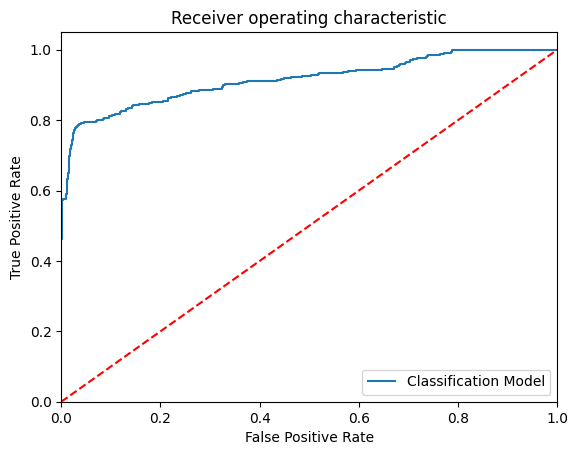

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[259827  54378]
 [    71 314134]]
Outcome values : 
 259827 54378 71 314134
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.83      0.91    314205
           0       0.85      1.00      0.92    314205

    accuracy                           0.91    628410
   macro avg       0.93      0.91      0.91    628410
weighted avg       0.93      0.91      0.91    628410

Accuracy : 91.3 %
Precision : 100.0 %
Recall : 82.7 %
F1 Score : 0.905
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 91.4 %
MCC : 29.296
roc_auc_score: 0.913


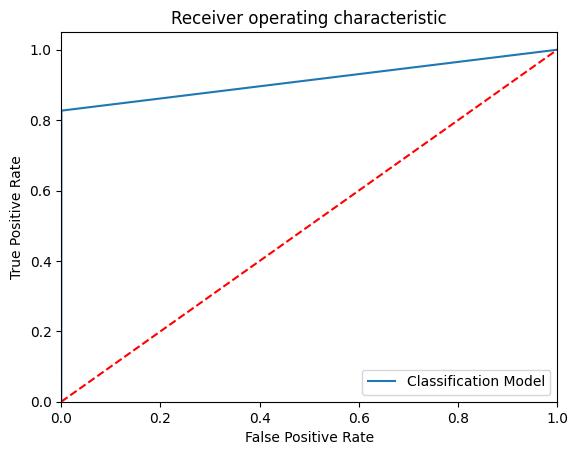

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[258877  55328]
 [    12 314193]]
Outcome values : 
 258877 55328 12 314193
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.82      0.90    314205
           0       0.85      1.00      0.92    314205

    accuracy                           0.91    628410
   macro avg       0.93      0.91      0.91    628410
weighted avg       0.93      0.91      0.91    628410

Accuracy : 91.2 %
Precision : 100.0 %
Recall : 82.4 %
F1 Score : 0.903
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 91.2 %
MCC : 168.008
roc_auc_score: 0.912


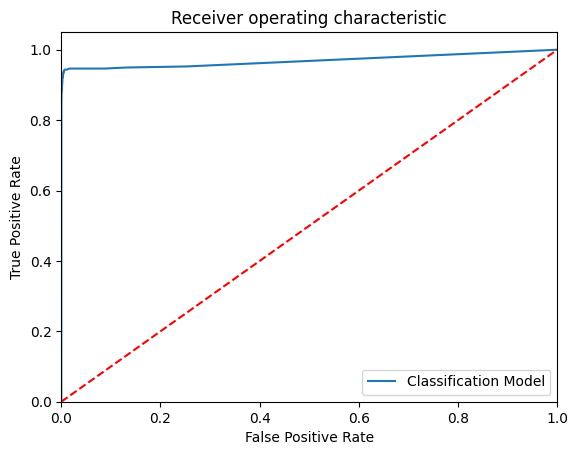

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[245659  68546]
 [     5 314200]]
Outcome values : 
 245659 68546 5 314200
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.78      0.88    314205
           0       0.82      1.00      0.90    314205

    accuracy                           0.89    628410
   macro avg       0.91      0.89      0.89    628410
weighted avg       0.91      0.89      0.89    628410

Accuracy : 89.1 %
Precision : 100.0 %
Recall : 78.2 %
F1 Score : 0.878
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 89.1 %
MCC : 38.24
roc_auc_score: 0.891


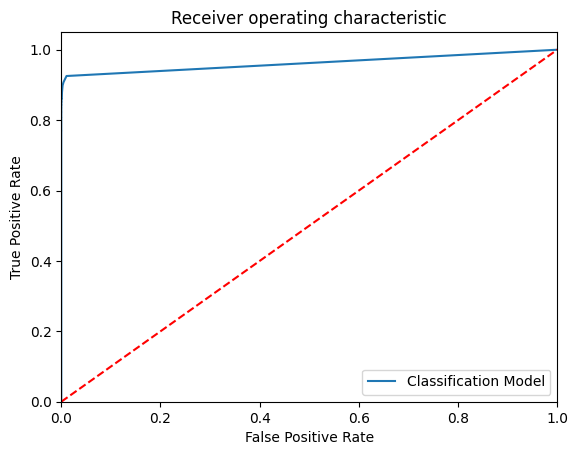

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[262826  51379]
 [ 74033 240172]]
Outcome values : 
 262826 51379 74033 240172
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.84      0.81    314205
           0       0.82      0.76      0.79    314205

    accuracy                           0.80    628410
   macro avg       0.80      0.80      0.80    628410
weighted avg       0.80      0.80      0.80    628410

Accuracy : 80.0 %
Precision : 78.0 %
Recall : 83.6 %
F1 Score : 0.807
Specificity or True Negative Rate : 76.4 %
Balanced Accuracy : 80.0 %
MCC : 22.308
roc_auc_score: 0.8


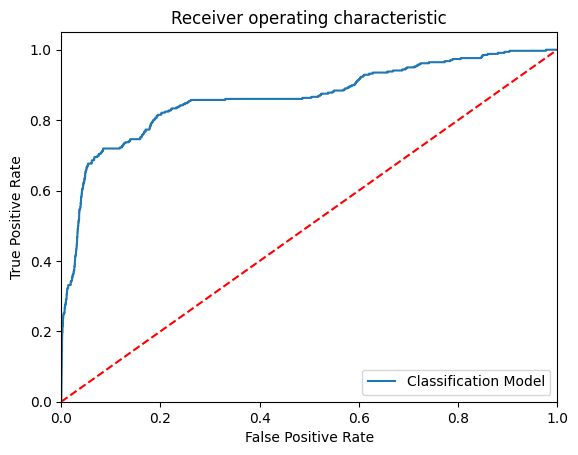

-----------------------------------------------------------------------------------------------------


In [66]:
#==Step_02=============================================================================================================>

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
# MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelGNB]

for models in MM:

    # Train the model training dataset

    models.fit(x_train, y_train)

    # Prediction the model with test dataset

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round((abs((tp * tn) - (fp * fn)) / sqrt(abs(mx))), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Classification_Results = Classification_Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>




In [67]:
# displaying the classification results data
Classification_Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),244923,69282,9901,304304,0.874,0.961,0.780,0.861,0.968,24.512,0.873995,0.874
1,DecisionTreeClassifier(),259026,55179,67,314138,0.912,1.000,0.824,0.904,1.000,57.684,0.912086,0.912
2,"(DecisionTreeClassifier(max_features='sqrt', r...",257948,56257,12,314193,0.910,1.000,0.821,0.902,1.000,28.689,0.910458,0.910
3,LogisticRegression(),244923,69282,9901,304304,0.874,0.961,0.780,0.861,0.968,24.512,0.873995,0.874
4,DecisionTreeClassifier(),258004,56201,65,314140,0.910,1.000,0.821,0.902,1.000,26.735,0.910463,0.910
5,LogisticRegression(),244923,69282,9901,304304,0.874,0.961,0.780,0.861,0.968,24.512,0.873995,0.874
6,DecisionTreeClassifier(),259827,54378,71,314134,0.913,1.000,0.827,0.905,1.000,29.296,0.913354,0.914
7,"(DecisionTreeClassifier(max_features='sqrt', r...",258877,55328,12,314193,0.912,1.000,0.824,0.903,1.000,168.008,0.911936,0.912
8,"(ExtraTreeClassifier(random_state=949519713), ...",245659,68546,5,314200,0.891,1.000,0.782,0.878,1.000,38.240,0.890914,0.891
9,GaussianNB(),262826,51379,74033,240172,0.800,0.780,0.836,0.807,0.764,22.308,0.800430,0.800


In [69]:

y_pred_best=ModelRF.predict(x_test)
results=pd.DataFrame({'actual':y_test,'predicted':y_pred_best})
ResultsFinal=x_test.merge(results,left_index=True,right_index=True)
ResultsFinal

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,actual,predicted
0,0.436170,3,0.000783,0.005721,0.005486,0.000000,0.000000,0,0
1,0.425532,3,0.002720,0.008467,0.007710,0.000000,0.000000,0,0
2,0.265957,4,0.009738,0.000691,0.000000,0.000000,0.002308,0,0
3,0.393617,4,0.067908,0.000000,0.000000,0.042145,0.055130,0,0
4,0.063830,0,0.029559,0.100050,0.107265,0.012667,0.000000,0,0
...,...,...,...,...,...,...,...,...,...
628405,0.063830,4,0.026243,0.006906,0.000000,0.000000,0.000000,1,1
628406,0.446809,4,0.002999,0.000789,0.000000,0.000000,0.000000,1,1
628407,0.053191,1,0.001732,0.000456,0.000000,0.000148,0.000000,1,1
628408,0.574468,4,0.076063,0.020016,0.000000,0.000000,0.000000,1,1


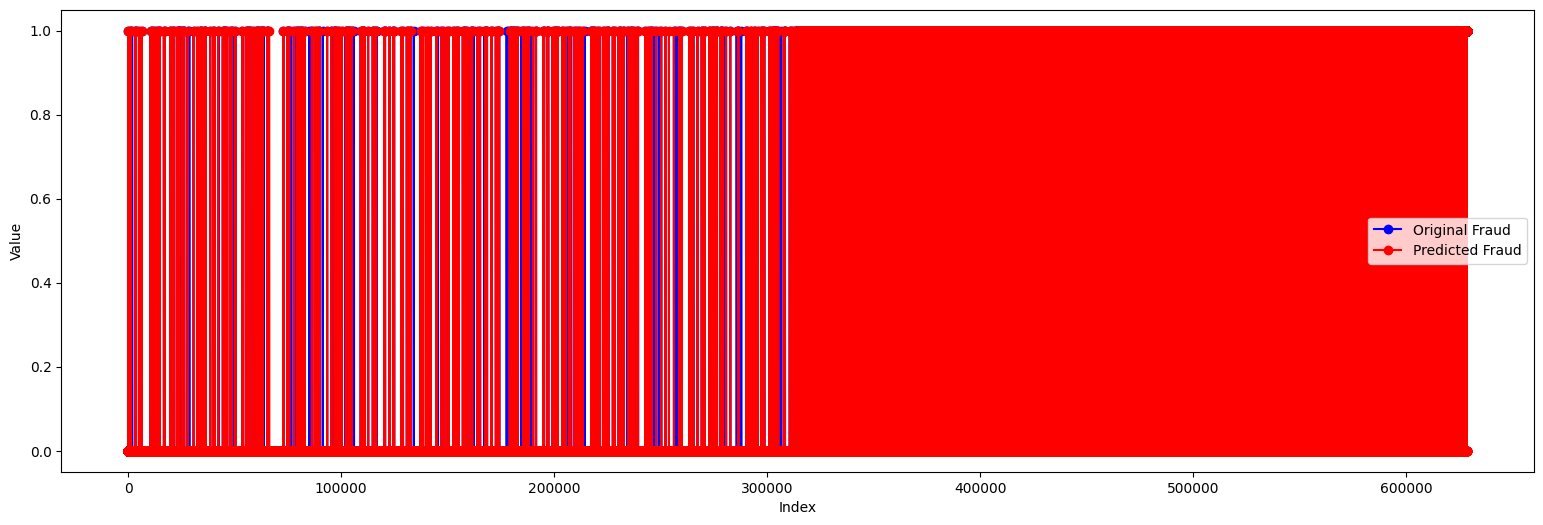

In [70]:
# resizing the plot
plt.figure(figsize=(19,6))

# plot original values in blue
plt.plot(ResultsFinal.index, ResultsFinal['actual'], 'bo-', label='Original Fraud')

# plot predicted values in red
plt.plot(ResultsFinal.index, ResultsFinal['predicted'], 'ro-', label='Predicted Fraud')

# add legend
plt.legend()

# add axis labels
plt.xlabel('Index')
plt.ylabel('Value')

# show plot
plt.show()
